# Project: Wrangling and Analyze Data

## INTRODUCTION

### Importing all required packages

In [1]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from matplotlib import pyplot as plt
import requests
import os
from dotenv import load_dotenv
import string
import re
import seaborn as sns

## Data Gathering

> Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Manually downloaded WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

dogs_df = pd.read_csv('twitter-archive-enhanced.csv')

> Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Using Request library to download tweet image prediction (image_predictions.tsv)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

> Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
#Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
#My keys are hidden to comply with Twitter's API terms and conditions

load_dotenv()

consumer_key = os.getenv('consumer_key')
consumer_secret = os.getenv('consumer_secret')
access_token = os.getenv('access_token ')
access_secret = os.getenv('access_secret')

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = dogs_df.tweet_id.values
len(tweet_ids)

### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

### Creating all 3 Dataframes froms gathered data

In [4]:
#displaying the Dataframe for archived dogs data

dogs_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [5]:
#creating and displaying the  DataFrame for the tweet image prediction file 

imgpred_df = pd.read_csv('image-predictions.tsv', sep='\t')

imgpred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [6]:
#creating and displaying the  DataFrame for the querriedadditional data via the Twitter API (tweet_json.txt)

tweets_df = pd.read_json('tweet_json.txt', lines=True)

## Assessing Data




### Assessment of dogs_df 

In [7]:
#Display full record length

pd.set_option('display.max_colwidth', None)

#### Visual Assessment

In [8]:
#Converting dogs_df to excel for visual assessment

writer = pd.ExcelWriter('dogs_excel.xlsx')
dogs_df.to_excel(writer)
writer.save()

#### Programmatic Assessment

In [9]:
dogs_df.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [10]:
dogs_df.tail(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2306,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666835007768551424/photo/1,10,10,None,None,None,None,None
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 simply brilliant pup https://t.co/V6ZzG45zzG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780179869698/photo/1,12,10,None,None,None,None,None
2308,666817836334096384,NaN,NaN,2015-11-18 03:18:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jeph. He is a German Boston Shuttlecock. Enjoys couch. Lost body during French Revolution. True hero 9/10 https://t.co/8whlkYw3mO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666817836334096384/photo/1,9,10,Jeph,None,None,None,None
2309,666804364988780544,NaN,NaN,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jockson. He is a Pinnacle Sagittarius. Fancy bandana. Enjoys lightly sucking on hot dog in nature. 8/10 https://t.co/RdKbAOEpDK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666804364988780544/photo/1,8,10,Jockson,None,None,None,None
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068205871104/photo/1,2,10,None,None,None,None,None
2311,666781792255496192,NaN,NaN,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666781792255496192/photo/1,10,10,a,None,None,None,None
2312,666776908487630848,NaN,NaN,2015-11-18 00:36:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Josep. He is a Rye Manganese mix. Can drive w eyes closed. Very irresponsible. Menace on the roadways. 5/10 https://t.co/XNGeDwrtYH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666776908487630848/photo/1,5,10,Josep,None,None,None,None
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327293083650/photo/1,10,10,Lugan,None,None,None,None
2314,666701168228331520,NaN,NaN,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666701168228331520/photo/1,8,10,a,None,None,None,None
2315,666691418707132416,NaN,NaN,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Christoper. He is a spotted Penne. Can easily navigate stairs. 8/10 https://t.co/bg4TqvvkuF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666691418707132416/photo/1,8,10,Christoper,None,None,None

In [11]:
dogs_df.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1365,702684942141153280,NaN,NaN,2016-02-25 02:42:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She's sick of these bullshit generalizations 11/10 https://t.co/d2b5C2R0aO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702684942141153280/photo/1,11,10,Lucy,None,None,None,None
459,817827839487737858,NaN,NaN,2017-01-07 20:18:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Buddy. He ran into a glass door once. Now he's h*ckin skeptical. 13/10 empowering af (vid by Brittany Gaunt) https://t.co/q2BgNIi3OA,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817827839487737858/video/1,13,10,Buddy,None,None,None,None
577,800855607700029440,NaN,NaN,2016-11-22 00:17:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Lin_Manuel: 11/10 would recommend. https://t.co/pnUF69K4xk,8.008540e+17,7.992370e+07,2016-11-22 00:10:52 +0000,"https://twitter.com/littlewiewel/status/800852955880628224,https://twitter.com/littlewiewel/status/800852955880628224",11,10,None,None,None,None,None
2186,668981893510119424,NaN,NaN,2015-11-24 02:38:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unique dog here. Oddly shaped tail. Long pink front legs. I don't think dogs breath underwater sos. 4/10 bad owner https://t.co/0EJXxE9UxW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668981893510119424/photo/1,4,10,None,None,None,None,None
1694,681281657291280384,NaN,NaN,2015-12-28 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sarge. His parents signed him up for dancing lessons but his true passion is roller coasters 11/10 very petable https://t.co/KvVoBIgkje,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681281657291280384/photo/1,11,10,Sarge,None,None,None,None
1458,695074328191332352,NaN,NaN,2016-02-04 02:40:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lorenzo. He's educated af. Just graduated college. 11/10 poor pupper can't even comprehend his debt https://t.co/dH3GzcjCtQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695074328191332352/photo/1,11,10,Lorenzo,None,None,pupper,None
1084,738402415918125056,NaN,NaN,2016-06-02 16:10:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Don't talk to me or my son ever again"" ...10/10 for both https://t.co/s96OYXZIfK",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738402415918125056/photo/1,10,10,None,None,None,None,None
858,763837565564780549,NaN,NaN,2016-08-11 20:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alfie. He's touching a butt. Couldn't be happier. 11/10 https://t.co/gx3xF5mZbo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763837565564780549/photo/1,11,10,Alfie,None,None,None,None
1286,708400866336894977,NaN,NaN,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",RT if you are as ready for summer as this pup is 12/10 https://t.co/xdNNEZdGJY,NaN,NaN,NaN,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None
1606,685667379192414208,NaN,NaN,2016-01-09 03:40:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Marty. He has no idea what happened here. Never seen this stuff in his life. 9/10 very suspicious pupper https://t.co/u427woxFpJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685667379192414208/photo/1,9,10,Marty,None,None,pupper,None


In [12]:
dogs_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [13]:
dogs_df.text.tail(50)

2306    These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1
2307                                                                                                  12/10 simply brilliant pup https://t.co/V6ZzG45zzG
2308           This is Jeph. He is a German Boston Shuttlecock. Enjoys couch. Lost body during French Revolution. True hero 9/10 https://t.co/8whlkYw3mO
2309             This is Jockson. He is a Pinnacle Sagittarius. Fancy bandana. Enjoys lightly sucking on hot dog in nature. 8/10 https://t.co/RdKbAOEpDK
2310         Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S
2311                                         This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa
2312         This is Josep. He is a Rye Manganese mix. Can drive w eyes closed. Ve

In [14]:
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
dogs_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
dogs_df.sort_values(by='rating_numerator', ascending=True).head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055577362432/photo/1,1,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376133427200/photo/1,1,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437142401025/photo/1,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is be

#### dog_df observations
    1. Need to convert 'timestamp' column into datestamp and tweet_id into object(string)
    2. Need to Check  the max values of the rating numerator and denominator
    3. Need to melt last four columns into dog_stage and categorize it
    4. Need to cleans some colums not needed since we do net need retweets 
    5. Some dog names are missing but are contained in the text, others are none and others are "a".
    6. Remove urls from source colums, remove ratings and url from text colum

### Assessment of imgpred_df 

#### Visual Assessment

In [17]:
#Converting imgpred_df to excel for visual assessment

writer = pd.ExcelWriter('imageprediction_excel.xlsx')
imgpred_df.to_excel(writer)
writer.save()

#### Programmatic Assessment


In [18]:
imgpred_df.head(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
imgpred_df.tail(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2025,881906580714921986,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,1,Weimaraner,0.291539,True,Chesapeake_Bay_retriever,0.278966,True,koala,0.127017,False
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2027,882268110199369728,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1,golden_retriever,0.762211,True,Labrador_retriever,0.098985,True,cocker_spaniel,0.017199,True
2028,882627270321602560,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg,1,Pembroke,0.542982,True,Chihuahua,0.251988,True,Cardigan,0.107699,True
2029,882762694511734784,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True
2030,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False
2031,883117836046086144,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,golden_retriever,0.949562,True,Labrador_retriever,0.045948,True,kuvasz,0.002471,True
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True


In [20]:
imgpred_df.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
536,676946864479084545,https://pbs.twimg.com/media/CWT_lOQWUAAXPaY.jpg,1,Pekinese,0.752707,True,golden_retriever,0.055655,True,Great_Pyrenees,0.041018,True
1469,779056095788752897,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053364,True
1010,709409458133323776,https://pbs.twimg.com/media/CdhUIMSUIAA4wYK.jpg,1,Shetland_sheepdog,0.797450,True,collie,0.054055,True,keeshond,0.031673,True
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True
1245,747512671126323200,https://pbs.twimg.com/media/Cl-yykwWkAAqUCE.jpg,1,Cardigan,0.111493,True,malinois,0.095089,True,German_shepherd,0.080146,True
1176,737678689543020544,https://pbs.twimg.com/media/CjzC2oGWYAAyIfG.jpg,1,Pembroke,0.935307,True,Cardigan,0.049874,True,Chihuahua,0.011603,True
1683,813944609378369540,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True
581,678774928607469569,https://pbs.twimg.com/media/CWt-MNIWEAAUC9S.jpg,1,Pembroke,0.194681,True,toy_poodle,0.121821,True,Pomeranian,0.096843,True
66,667176164155375616,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,1,soft-coated_wheaten_terrier,0.318981,True,Lakeland_terrier,0.215218,True,toy_poodle,0.106014,True
1059,714982300363173890,https://pbs.twimg.com/media/CewgnHAXEAAdbld.jpg,1,Brittany_spaniel,0.944376,True,beagle,0.025435,True,Ibizan_hound,0.009962,True


In [21]:
imgpred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
imgpred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### imgpred_df observations

    1.  the need to correctl predicted dogs for analysis

### Assessment of tweet_df 

#### Visual Assessment

#### Could not convert to excel due to datetime compactibility which  is yet to be cleaned
> ValueError: Excel does not support datetimes with timezones. Please ensure that datetimes are timezone unaware before writing to Excel.

#### Programmatic Assessment

In [23]:
tweets_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'h

In [24]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   id                             2327 non-null   int64              
 2   id_str                         2327 non-null   int64              
 3   full_text                      2327 non-null   object             
 4   truncated                      2327 non-null   bool               
 5   display_text_range             2327 non-null   object             
 6   entities                       2327 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2327 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

#### tweet_df observations
>   1. Need to delete some colums not needed.
>   2. Need to merge dfs. 
>   3. Delete duplicated columns and rows

## Issues observed that reqiures cleaning

### Quality issues

>   1.  Delete duplicated rows and records with same tweet id.  
>   2.  Delete all retweets rows
>   3.  Identify missing and wrong dog names
>   4.  Delete all rows without images
>   5.  Fix nwrong ratings
>   6.  Remove urls from source colum
>   7.  Extract ratings from text colum and update into respecctive columns     
>   8.  Need to convert 'timestamp' column into datestamp
>   9.  Need to correctly identify real dogs with corresponding breeds for analysis


-----

### Tidiness issues

>   1.   Delete irrelevant columns
>   2.   Rename some columns header
>   3.   Need to melt last four columns into dog_stage and categorize it
>   4.   Need to merge dfs to make analysis simpler
  

------

## Cleaning Data

> ### Cleaning will be categorised into

 Duplicates.
 
 Incorrect data types
 
 Missing data
 
 Structural problems, such as different column names



In [25]:
# Make copies of original pieces of data
dogx = dogs_df.copy()
imgx = imgpred_df.copy()
tweetx = tweets_df.copy()

---------

### Issue #1:  Check and delete duplicated records with same  tweet_id's.

#### Define: 

#### For all the data frames, we will identify repeated records on tweet_id to be deleted to make the cleaning easier and analyis simple

>   dogx, imgx, tweetx

#### Code

>> #### For dogx

In [26]:
dogx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [27]:
dogx.duplicated().sum()

0

In [28]:
dogx.tweet_id.duplicated().sum()

0

>  No duplicated records in the dog archived  df 

>> #### For imgx

In [29]:
imgx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
imgx.duplicated().sum()

0

In [31]:
imgx.tweet_id.duplicated().sum()

0

> No duplicated record in image prediction df using tweet id

In [32]:
#Checking for duplicated images by image url

imgx.jpg_url.duplicated().sum()


66

In [33]:
imgx_dups = imgx[imgx.jpg_url.duplicated(keep=False)]

imgx_dups.sort_values(by='jpg_url')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


> Its obvious some images have been duplicated but will be deleted after merging with dogs archive df

>> #### For tweetx

In [34]:
tweetx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   id                             2327 non-null   int64              
 2   id_str                         2327 non-null   int64              
 3   full_text                      2327 non-null   object             
 4   truncated                      2327 non-null   bool               
 5   display_text_range             2327 non-null   object             
 6   entities                       2327 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2327 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [35]:
tweetx.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'h

In [36]:
tweetx.full_text.duplicated().sum()

0

> No duplicated id or full text in tweetx df 

#### Test



In [37]:
dogx.tweet_id.duplicated().sum()

0

In [38]:
imgx.tweet_id.duplicated().sum()

0

In [39]:
tweetx.id.duplicated().sum()

0

#### Remarks on Issue 1.

>> #### No duplicated ids but however, some other fields have duplicated values which will be cleaned later

_______________________________________

### Issue #2:  Delete all rows for  retweets and replies since they dont have original ratings

#### Define

> #### As part of the project requirements, we will only need to work with original tweets alone in the dogx hence all records identified as retweets will be dropped.



#### Code

In [40]:
dogx.shape

(2356, 17)

In [41]:
dogx.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [42]:
dogx.in_reply_to_status_id.unique()

array([           nan, 8.86266357e+17, 8.81607037e+17, 8.79553827e+17,
       8.70726203e+17, 8.63425646e+17, 6.67152164e+17, 8.57156678e+17,
       8.55818117e+17, 8.56286004e+17, 8.55861584e+17, 8.55858536e+17,
       8.50328819e+17, 8.48212112e+17, 8.47606176e+17, 7.59099524e+17,
       8.40698300e+17, 8.38145499e+17, 8.38085539e+17, 8.35245984e+17,
       8.32087548e+17, 8.31903044e+17, 8.26598365e+17, 8.23326389e+17,
       8.21152593e+17, 8.13127252e+17, 8.11627233e+17, 7.33109485e+17,
       8.01854331e+17, 8.00857954e+17, 7.97123751e+17, 7.72743019e+17,
       7.66711819e+17, 7.63865175e+17, 7.50180499e+17, 7.47648654e+17,
       7.46885919e+17, 6.91416866e+17, 7.38411920e+17, 7.29113531e+17,
       7.07980066e+17, 7.03255936e+17, 7.04485745e+17, 7.03041950e+17,
       6.96488711e+17, 6.75349384e+17, 6.70668383e+17, 6.93642232e+17,
       6.93572216e+17, 6.92417313e+17, 6.92041935e+17, 6.90341254e+17,
       6.86034025e+17, 6.85547936e+17, 6.84959799e+17, 6.84481075e+17,
      

In [43]:
dogx.in_reply_to_status_id.nunique()

77

In [44]:
dogx.in_reply_to_status_id.unique()

array([           nan, 8.86266357e+17, 8.81607037e+17, 8.79553827e+17,
       8.70726203e+17, 8.63425646e+17, 6.67152164e+17, 8.57156678e+17,
       8.55818117e+17, 8.56286004e+17, 8.55861584e+17, 8.55858536e+17,
       8.50328819e+17, 8.48212112e+17, 8.47606176e+17, 7.59099524e+17,
       8.40698300e+17, 8.38145499e+17, 8.38085539e+17, 8.35245984e+17,
       8.32087548e+17, 8.31903044e+17, 8.26598365e+17, 8.23326389e+17,
       8.21152593e+17, 8.13127252e+17, 8.11627233e+17, 7.33109485e+17,
       8.01854331e+17, 8.00857954e+17, 7.97123751e+17, 7.72743019e+17,
       7.66711819e+17, 7.63865175e+17, 7.50180499e+17, 7.47648654e+17,
       7.46885919e+17, 6.91416866e+17, 7.38411920e+17, 7.29113531e+17,
       7.07980066e+17, 7.03255936e+17, 7.04485745e+17, 7.03041950e+17,
       6.96488711e+17, 6.75349384e+17, 6.70668383e+17, 6.93642232e+17,
       6.93572216e+17, 6.92417313e+17, 6.92041935e+17, 6.90341254e+17,
       6.86034025e+17, 6.85547936e+17, 6.84959799e+17, 6.84481075e+17,
      

In [45]:
dogx.shape

(2356, 17)

In [46]:
# Drop all reply rows

dogx = dogx[dogx['in_reply_to_status_id'].isna()]

In [47]:
#Drop all rows with retweet

dogx = dogx[dogx['retweeted_status_id'].isna()]


#### Test


In [48]:
dogx.shape

(2097, 17)

#### Remarks on Issue 2.

>> #### All retweeted recored deleted. Thus 2356 - 2097 = 259 records deleted

-----------------

### Issue #3:  Delete irrelevant colums in all dfs

#### Define

> There are certain colums which are irrelevant to our analysis hence need to be deleted

#### Code

> #### For Dogx

In [49]:
dogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [50]:
#we delete column at iloc = 1, 2, 6, 7, 8

dogx = dogx.drop(dogx.columns[[1,2,6,7,8]], axis = 1)

dogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


> #### melt dog stages into one column

In [51]:
dogx.doggo.value_counts()

None     2014
doggo      83
Name: doggo, dtype: int64

In [52]:
dogx.floofer.value_counts()

None       2087
floofer      10
Name: floofer, dtype: int64

In [53]:
dogx.pupper.value_counts()

None      1867
pupper     230
Name: pupper, dtype: int64

In [54]:
dogx.puppo.value_counts()

None     2073
puppo      24
Name: puppo, dtype: int64

In [55]:
dogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [56]:
dogx.tail(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2306,666835007768551424,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1,https://twitter.com/dog_rates/status/666835007768551424/photo/1,10,10,None,None,None,None,None
2307,666826780179869698,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 simply brilliant pup https://t.co/V6ZzG45zzG,https://twitter.com/dog_rates/status/666826780179869698/photo/1,12,10,None,None,None,None,None
2308,666817836334096384,2015-11-18 03:18:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jeph. He is a German Boston Shuttlecock. Enjoys couch. Lost body during French Revolution. True hero 9/10 https://t.co/8whlkYw3mO,https://twitter.com/dog_rates/status/666817836334096384/photo/1,9,10,Jeph,None,None,None,None
2309,666804364988780544,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jockson. He is a Pinnacle Sagittarius. Fancy bandana. Enjoys lightly sucking on hot dog in nature. 8/10 https://t.co/RdKbAOEpDK,https://twitter.com/dog_rates/status/666804364988780544/photo/1,8,10,Jockson,None,None,None,None
2310,666786068205871104,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S,https://twitter.com/dog_rates/status/666786068205871104/photo/1,2,10,None,None,None,None,None
2311,666781792255496192,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa,https://twitter.com/dog_rates/status/666781792255496192/photo/1,10,10,a,None,None,None,None
2312,666776908487630848,2015-11-18 00:36:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Josep. He is a Rye Manganese mix. Can drive w eyes closed. Very irresponsible. Menace on the roadways. 5/10 https://t.co/XNGeDwrtYH,https://twitter.com/dog_rates/status/666776908487630848/photo/1,5,10,Josep,None,None,None,None
2313,666739327293083650,2015-11-17 22:06:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,https://twitter.com/dog_rates/status/666739327293083650/photo/1,10,10,Lugan,None,None,None,None
2314,666701168228331520,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB,https://twitter.com/dog_rates/status/666701168228331520/photo/1,8,10,a,None,None,None,None
2315,666691418707132416,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Christoper. He is a spotted Penne. Can easily navigate stairs. 8/10 https://t.co/bg4TqvvkuF,https://twitter.com/dog_rates/status/666691418707132416/photo/1,8,10,Christoper,None,None,None,None


> Some dogs have multiple records as a result of either two dogs in a picture or uncertain dog stage. we will identify those dogs for the cleaning later

In [57]:
# Combine all stage names into one column called stage

dogx['stage']=dogx.doggo + dogx.floofer + dogx.pupper + dogx.puppo

In [58]:
dogx.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
1480,693486665285931008,2016-01-30 17:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lincoln. He doesn't understand his new jacket. 11/10 please enjoy (vid by @GraceIsTheName8) https://t.co/S6cQsIoX27,https://twitter.com/dog_rates/status/693486665285931008/video/1,11,10,Lincoln,None,None,None,None,NoneNoneNoneNone


In [59]:
dogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
 12  stage               2097 non-null   object
dtypes: int64(3), object(10)
memory usage: 229.4+ KB


In [60]:
#we drop existing redundant stage columns

dogx = dogx.drop(dogx.columns[[8,9,10,11]], axis = 1)

In [61]:
dogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   stage               2097 non-null   object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


In [62]:
dogx.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
39,884876753390489601,2017-07-11 20:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lola. It's her first time outside. Must test the earth and taste the atmosphere. 13/10 you're doing great Lola https://t.co/74TKAUsLkO,"https://twitter.com/dog_rates/status/884876753390489601/photo/1,https://twitter.com/dog_rates/status/884876753390489601/photo/1,https://twitter.com/dog_rates/status/884876753390489601/photo/1,https://twitter.com/dog_rates/status/884876753390489601/photo/1",13,10,Lola,NoneNoneNoneNone


In [63]:
#We clear None in name with ' '

dogx['stage'] = dogx.stage.str.replace('None', '')

In [64]:
dogx.stage.value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [65]:
#we stage rename to get clear categories

dogx = dogx.replace({'stage': {'doggopupper':'doggo\pupper',
                         'floofer':'', 
                         'doggopuppo':'doggo\puppo', 
                         'doggofloofer':'doggo'}})

In [66]:
dogx.stage.value_counts()

                1770
pupper           221
doggo             73
puppo             23
doggo\pupper       9
doggo\puppo        1
Name: stage, dtype: int64

In [67]:
#Convert empty stages with None

dogx = dogx.replace('', None)

In [68]:
dogx.stage.value_counts()

pupper          221
doggo            73
puppo            23
doggo\pupper      9
doggo\puppo       1
Name: stage, dtype: int64

> #### Test

> #### For image prediction  df

In [69]:
imgx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [70]:
imgx.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [71]:
imgx.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> ####  Function to choose the highest probable prediction from all three predictors

In [72]:
#Choosing best prediction based on probability of all 3 predictors

def breed_check(row):
    conf = 0
    breed = ''
    is_bread = False
    if(row.p1_dog == True):
        if(row.p1_conf >= conf):
            conf = row.p1_conf
            breed = row.p1
            is_bread = True
    if(row.p2_dog == True):
        if(row.p2_conf >= conf):
            conf = row.p2_conf
            breed = row.p2
            is_bread = True
    if(row.p3_dog == True):
        if(row.p3_conf >= conf):
            conf = row.p3_conf
            breed = row.p3
            is_bread = True
    if is_bread == False:
        return None
    else:
        return breed
        
        
    
imgx['breed'] = imgx.apply(breed_check, axis=1)

In [73]:
imgx.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None


In [74]:
imgx.shape

(2075, 13)

In [75]:
imgx.breed.value_counts()

golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: breed, Length: 113, dtype: int64

In [76]:
imgx.breed.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', None, 'chow', 'golden_retriever',
       'miniature_poodle', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'Italian_greyhound',
       'Maltese_dog', 'Newfoundland', 'malamute',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'toy_terrier', 'Blenheim_spaniel',
       'Pembroke', 'Irish_terrier', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'miniature_schnauzer',
       'Airedale', 'Rottweiler', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'Siberian_husky',
       'papillon', 'Saint_Bernard', 'Tibetan_terrier', 'borzoi', 'beagle',
       'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'boxer

In [77]:
imgx.breed.value_counts().sum()

1751

In [78]:
imgx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
 12  breed     1751 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 168.3+ KB


In [79]:
#we drop all other columns after getting our best prediction of breed

imgx = imgx.drop(imgx.columns[[2,3,4,6,7,8,9,10,11]], axis = 1)

In [80]:
imgx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   jpg_url   2075 non-null   object
 2   p1_dog    2075 non-null   bool  
 3   breed     1751 non-null   object
dtypes: bool(1), int64(1), object(2)
memory usage: 50.8+ KB


> #### For tweets df

In [81]:
tweetx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   id                             2327 non-null   int64              
 2   id_str                         2327 non-null   int64              
 3   full_text                      2327 non-null   object             
 4   truncated                      2327 non-null   bool               
 5   display_text_range             2327 non-null   object             
 6   entities                       2327 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2327 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [82]:
#Drop all colums except id, retweet_count and favourite_count 

tweetx = tweetx.reindex(columns=['id', 'retweet_count', 'favorite_count'])


In [83]:
tweetx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


>#### Remarks on Issue 3.

Serial | df | Initial Columns| Deleted  | Maintained
---  |  --- | --- | --- | ---
1 | dogs archived       |       16    |   5  |  11
2 | image prediction                |       11    |   7  |  4
3 | tweet_counts          |     31   |   28 |  3


________________

### Issue #4: Rename all column headers for normalisation and test for duplicate headers

#### Define

> #### The need to have same primary id across all df for easy merging and also descriptive column names

#### Code

>> #### For dogs archived df

In [84]:
dogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   stage               327 non-null    object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


In [85]:
dogx.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None


In [86]:
#rename the following column headers

dogx.rename(columns = {'timestamp':'date_time', 'expanded_urls':'links', 'rating_numerator':'rating_num', 'rating_denominator':'rating_denom',}, inplace = True)

In [87]:
dogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      2097 non-null   int64 
 1   date_time     2097 non-null   object
 2   source        2097 non-null   object
 3   text          2097 non-null   object
 4   links         2094 non-null   object
 5   rating_num    2097 non-null   int64 
 6   rating_denom  2097 non-null   int64 
 7   name          2097 non-null   object
 8   stage         327 non-null    object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


In [88]:
#Rearrange colummns positions

dogx = dogx.reindex(columns=['tweet_id', 'date_time', 'source', 'text', 'name', 'stage', 'rating_num', 'rating_denom', 'links'])

#### Test

In [89]:
dogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      2097 non-null   int64 
 1   date_time     2097 non-null   object
 2   source        2097 non-null   object
 3   text          2097 non-null   object
 4   name          2097 non-null   object
 5   stage         327 non-null    object
 6   rating_num    2097 non-null   int64 
 7   rating_denom  2097 non-null   int64 
 8   links         2094 non-null   object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


In [90]:
dogx.stage.value_counts()

pupper          221
doggo            73
puppo            23
doggo\pupper      9
doggo\puppo       1
Name: stage, dtype: int64

> #### For image prediction df

In [91]:
imgx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   jpg_url   2075 non-null   object
 2   p1_dog    2075 non-null   bool  
 3   breed     1751 non-null   object
dtypes: bool(1), int64(1), object(2)
memory usage: 50.8+ KB


In [92]:
imgx.head()

,tweet_id,jpg_url,p1_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,True,miniature_pinscher


In [93]:
#Rename jpg_url to image_url, p1 to breed, p1_dog to is_dog

imgx.rename(columns = {'jpg_url':'img_url','p1_dog':'is_dog'}, inplace = True)

#### Test

In [94]:
imgx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   img_url   2075 non-null   object
 2   is_dog    2075 non-null   bool  
 3   breed     1751 non-null   object
dtypes: bool(1), int64(1), object(2)
memory usage: 50.8+ KB


In [95]:
imgx.head()

,tweet_id,img_url,is_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,True,miniature_pinscher


> #### For tweets df

In [96]:
tweetx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [97]:
#rename id column as tweet_id

tweetx.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [98]:
tweetx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [99]:
tweetx.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7010,33822
1,892177421306343426,5302,29338
2,891815181378084864,3482,22068
3,891689557279858688,7228,36948
4,891327558926688256,7764,35321


------

### Merge all 3 data frames

In [100]:
dogx.shape

(2097, 9)

In [101]:
imgx.shape

(2075, 4)

In [102]:
tweetx.shape

(2327, 3)

In [103]:
dogx.tweet_id.duplicated().sum()

0

In [104]:
imgx.tweet_id.duplicated().sum()

0

In [105]:
tweetx.tweet_id.duplicated().sum()

0

In [106]:
tweetx.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7010,33822
1,892177421306343426,5302,29338
2,891815181378084864,3482,22068
3,891689557279858688,7228,36948
4,891327558926688256,7764,35321


In [107]:
merged = pd.merge(dogx, imgx, on='tweet_id')

In [108]:
merged = pd.merge(merged, tweetx, on='tweet_id')

In [109]:
merged.head()

,tweet_id,date_time,source,text,name,stage,rating_num,rating_denom,links,img_url,is_dog,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,None,13,10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,False,None,7010,33822
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,None,13,10,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,True,Chihuahua,5302,29338
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,None,12,10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,True,Chihuahua,3482,22068
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,None,13,10,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,False,Labrador_retriever,7228,36948
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,None,12,10,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,True,basset,7764,35321


In [110]:
wrdogx = merged.copy()

In [111]:
wrdogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1963 non-null   int64 
 1   date_time       1963 non-null   object
 2   source          1963 non-null   object
 3   text            1963 non-null   object
 4   name            1963 non-null   object
 5   stage           295 non-null    object
 6   rating_num      1963 non-null   int64 
 7   rating_denom    1963 non-null   int64 
 8   links           1963 non-null   object
 9   img_url         1963 non-null   object
 10  is_dog          1963 non-null   bool  
 11  breed           1658 non-null   object
 12  retweet_count   1963 non-null   int64 
 13  favorite_count  1963 non-null   int64 
dtypes: bool(1), int64(5), object(8)
memory usage: 216.6+ KB


In [112]:
wrdogx.head()

,tweet_id,date_time,source,text,name,stage,rating_num,rating_denom,links,img_url,is_dog,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,None,13,10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,False,None,7010,33822
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,None,13,10,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,True,Chihuahua,5302,29338
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,None,12,10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,True,Chihuahua,3482,22068
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,None,13,10,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,False,Labrador_retriever,7228,36948
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,None,12,10,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,True,basset,7764,35321


### Test - Perform data intergrity test on merge cells that cant have duplicate values

In [113]:
wrdogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1963 non-null   int64 
 1   date_time       1963 non-null   object
 2   source          1963 non-null   object
 3   text            1963 non-null   object
 4   name            1963 non-null   object
 5   stage           295 non-null    object
 6   rating_num      1963 non-null   int64 
 7   rating_denom    1963 non-null   int64 
 8   links           1963 non-null   object
 9   img_url         1963 non-null   object
 10  is_dog          1963 non-null   bool  
 11  breed           1658 non-null   object
 12  retweet_count   1963 non-null   int64 
 13  favorite_count  1963 non-null   int64 
dtypes: bool(1), int64(5), object(8)
memory usage: 216.6+ KB


In [114]:
wrdogx.duplicated().sum()

0

In [115]:
wrdogx.tweet_id.duplicated().sum()

0

In [116]:
wrdogx.img_url.duplicated().sum()

0

> #### Remarks on Issue 4.

>After renamiming columns and merging all dfs, we renamed our new dataframe as wrdogx. Which will be used for further cleaning.

>Our new df has a shape of (1963, 14) but will still require further cleaning




---------

### Issue #5 Fix Missing Data Issues

#### Define

> #### Checking datatypes in the various columns we want to change

In [117]:
wrdogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1963 non-null   int64 
 1   date_time       1963 non-null   object
 2   source          1963 non-null   object
 3   text            1963 non-null   object
 4   name            1963 non-null   object
 5   stage           295 non-null    object
 6   rating_num      1963 non-null   int64 
 7   rating_denom    1963 non-null   int64 
 8   links           1963 non-null   object
 9   img_url         1963 non-null   object
 10  is_dog          1963 non-null   bool  
 11  breed           1658 non-null   object
 12  retweet_count   1963 non-null   int64 
 13  favorite_count  1963 non-null   int64 
dtypes: bool(1), int64(5), object(8)
memory usage: 216.6+ KB


In [118]:
wrdogx.head()

,tweet_id,date_time,source,text,name,stage,rating_num,rating_denom,links,img_url,is_dog,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,None,13,10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,False,None,7010,33822
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,None,13,10,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,True,Chihuahua,5302,29338
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,None,12,10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,True,Chihuahua,3482,22068
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,None,13,10,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,False,Labrador_retriever,7228,36948
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,None,12,10,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,True,basset,7764,35321


#### Code

In [119]:
#Convert merged dataframe  to excel for visual assessment

writer = pd.ExcelWriter('xoxo.xlsx')
wrdogx.to_excel(writer)
writer.save()

In [120]:
wrdogx.shape

(1963, 14)

In [121]:
wrdogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1963 non-null   int64 
 1   date_time       1963 non-null   object
 2   source          1963 non-null   object
 3   text            1963 non-null   object
 4   name            1963 non-null   object
 5   stage           295 non-null    object
 6   rating_num      1963 non-null   int64 
 7   rating_denom    1963 non-null   int64 
 8   links           1963 non-null   object
 9   img_url         1963 non-null   object
 10  is_dog          1963 non-null   bool  
 11  breed           1658 non-null   object
 12  retweet_count   1963 non-null   int64 
 13  favorite_count  1963 non-null   int64 
dtypes: bool(1), int64(5), object(8)
memory usage: 216.6+ KB


In [122]:
#drop unclassifed dogs ; those with no images

wrdogx = wrdogx[wrdogx['breed'] != None ]

wrdogx = wrdogx[wrdogx['img_url'] > '']

In [123]:
wrdogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1963 non-null   int64 
 1   date_time       1963 non-null   object
 2   source          1963 non-null   object
 3   text            1963 non-null   object
 4   name            1963 non-null   object
 5   stage           295 non-null    object
 6   rating_num      1963 non-null   int64 
 7   rating_denom    1963 non-null   int64 
 8   links           1963 non-null   object
 9   img_url         1963 non-null   object
 10  is_dog          1963 non-null   bool  
 11  breed           1658 non-null   object
 12  retweet_count   1963 non-null   int64 
 13  favorite_count  1963 non-null   int64 
dtypes: bool(1), int64(5), object(8)
memory usage: 216.6+ KB


In [124]:
#We can change datatypes to required for all columns

wrdogx = wrdogx.astype({"date_time":'datetime64',
                        "stage":'category',
                        "retweet_count":'int64',
                        "favorite_count":'int64',
                        "rating_num":'float',
                        "rating_denom":'float', 
                        "is_dog":'boolean'})

#### Test

In [125]:
wrdogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1963 non-null   int64         
 1   date_time       1963 non-null   datetime64[ns]
 2   source          1963 non-null   object        
 3   text            1963 non-null   object        
 4   name            1963 non-null   object        
 5   stage           295 non-null    category      
 6   rating_num      1963 non-null   float64       
 7   rating_denom    1963 non-null   float64       
 8   links           1963 non-null   object        
 9   img_url         1963 non-null   object        
 10  is_dog          1963 non-null   boolean       
 11  breed           1658 non-null   object        
 12  retweet_count   1963 non-null   int64         
 13  favorite_count  1963 non-null   int64         
dtypes: boolean(1), category(1), datetime64[ns](1), float64(2

In [126]:
wrdogx.shape

(1963, 14)

> #### Remarks on Issue #5. 

>#### After assessment,  we deleted the following rows
    1. All rows with no breed of dogs are deleted
    2. All rows without images
    
> Our df still has a records, of 1963 . 

______

### Issue #6   -  Clean Source Contents

#### Define

>  Remove all html tags from source link

#### Code

In [127]:
wrdogx.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1925
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [128]:
#Extract only source of tweer without  url

from bs4 import BeautifulSoup as bs

new_source = []
for line, row in wrdogx.iterrows():
    soup = bs(row.source)
    x = soup.find('a').contents[0]
    new_source.append(x)
    
wrdogx['source'] = new_source

#### Test

In [129]:
wrdogx.source.value_counts()

Twitter for iPhone    1925
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

In [130]:
wrdogx.shape

(1963, 14)

In [131]:
wrdogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1963 non-null   int64         
 1   date_time       1963 non-null   datetime64[ns]
 2   source          1963 non-null   object        
 3   text            1963 non-null   object        
 4   name            1963 non-null   object        
 5   stage           295 non-null    category      
 6   rating_num      1963 non-null   float64       
 7   rating_denom    1963 non-null   float64       
 8   links           1963 non-null   object        
 9   img_url         1963 non-null   object        
 10  is_dog          1963 non-null   boolean       
 11  breed           1658 non-null   object        
 12  retweet_count   1963 non-null   int64         
 13  favorite_count  1963 non-null   int64         
dtypes: boolean(1), category(1), datetime64[ns](1), float64(2

In [132]:
wrdogx.head()

,tweet_id,date_time,source,text,name,stage,rating_num,rating_denom,links,img_url,is_dog,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,NaN,13.0,10.0,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,False,None,7010,33822
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,NaN,13.0,10.0,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,True,Chihuahua,5302,29338
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,NaN,12.0,10.0,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,True,Chihuahua,3482,22068
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,NaN,13.0,10.0,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,False,Labrador_retriever,7228,36948
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,NaN,12.0,10.0,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,True,basset,7764,35321


In [133]:
#convert source to category data

wrdogx = wrdogx.astype({"source":'category'})

> #### Remarks on Issue #6. 

>#### After cleaning, 3 main sources were identified for the tweets.
    1. Twitter for iPhone   
    2. Twitter Web Client     
    3. TweetDeck            

_______

### Issue #7   -  Clean Wrong Names

#### Define 


>   Some names are blank and others have wrong values

In [134]:
wrdogx.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
1958        None
1959           a
1960           a
1961           a
1962        None
Name: name, Length: 1963, dtype: object

In [135]:
wrdogx.name.value_counts()

None          523
a              55
Cooper         10
Charlie        10
Oliver         10
             ... 
Shiloh          1
Burt            1
Gustav          1
Arlen           1
Christoper      1
Name: name, Length: 933, dtype: int64

#### Code



In [136]:
wrdogx.name.value_counts()

None          523
a              55
Cooper         10
Charlie        10
Oliver         10
             ... 
Shiloh          1
Burt            1
Gustav          1
Arlen           1
Christoper      1
Name: name, Length: 933, dtype: int64

In [137]:
wrdogx.name.value_counts().tail(40)

Stark         1
Beya          1
Zooey         1
Kayla         1
Quinn         1
Bell          1
Tilly         1
Aqua          1
Harvey        1
Baloo         1
Chase         1
Nollie        1
Rorie         1
Simba         1
Bayley        1
Meatball      1
Storkson      1
Blanket       1
Jersey        1
Stewie        1
Divine        1
Milky         1
Lilah         1
Spanky        1
Jameson       1
Jordy         1
Blu           1
Dietrich      1
not           1
Tripp         1
Lenox         1
his           1
Cora          1
Huxley        1
Bookstore     1
Shiloh        1
Burt          1
Gustav        1
Arlen         1
Christoper    1
Name: name, dtype: int64

In [138]:
wrdogx['name'] = wrdogx['name'].apply(lambda x: x if str(x).lower() != x else None )

#### Test

In [139]:
wrdogx['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
1958        None
1959        None
1960        None
1961        None
1962        None
Name: name, Length: 1963, dtype: object

In [140]:
wrdogx.name.sort_values().tail(40)

1635    None
1646    None
1650    None
1652    None
1680    None
1730    None
1739    None
1742    None
1760    None
1766    None
1774    None
1802    None
1809    None
1815    None
1822    None
1828    None
1832    None
1845    None
1859    None
1865    None
1872    None
1881    None
1895    None
1911    None
1918    None
1921    None
1933    None
1934    None
1940    None
1941    None
1942    None
1952    None
1953    None
1954    None
1955    None
1956    None
1957    None
1959    None
1960    None
1961    None
Name: name, dtype: object

In [141]:
wrdogx.name.value_counts()

None          523
Cooper         10
Charlie        10
Oliver         10
Lucy            9
             ... 
Glenn           1
Shelby          1
Sephie          1
Bonaparte       1
Christoper      1
Name: name, Length: 911, dtype: int64

> #### Remarks on Issue #7. 

> All irregular names have been cleaned and unidentified names are labelled unknown. 

### Issue #8   -  Clean Irregular Ratings

#### Define 


> Ensure denominaters have 10 and numerators have less that 15 values

#### Code

In [142]:
wrdogx.head()

,tweet_id,date_time,source,text,name,stage,rating_num,rating_denom,links,img_url,is_dog,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,NaN,13.0,10.0,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,False,None,7010,33822
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,NaN,13.0,10.0,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,True,Chihuahua,5302,29338
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,NaN,12.0,10.0,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,True,Chihuahua,3482,22068
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,NaN,13.0,10.0,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,False,Labrador_retriever,7228,36948
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,NaN,12.0,10.0,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,True,basset,7764,35321


In [143]:
#Extract Ratings from text using Regex

wrdogx['rating_num'] = wrdogx['text'].str.extract((r'((?:\d+\.)?\d+)\/\d+'), expand=True).astype(float)

In [144]:
wrdogx[wrdogx.rating_denom > 10]

,tweet_id,date_time,source,text,name,stage,rating_num,rating_denom,links,img_url,is_dog,breed,retweet_count,favorite_count
316,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,None,NaN,84.0,70.0,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,True,West_Highland_white_terrier,3004,11593
652,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,None,NaN,165.0,150.0,https://twitter.com/dog_rates/status/758467244762497024/video/1,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,True,Labrador_retriever,2031,4482
787,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",None,NaN,9.0,11.0,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,True,golden_retriever,12148,32622
835,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,None,NaN,204.0,170.0,https://twitter.com/dog_rates/status/731156023742988288/photo/1,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,False,None,1145,3554
877,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,None,NaN,4.0,20.0,https://twitter.com/dog_rates/status/722974582966214656/photo/1,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,True,Great_Dane,1443,3779
911,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,Bluebert,NaN,50.0,50.0,https://twitter.com/dog_rates/status/716439118184652801/photo/1,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,True,Siberian_husky,191,2203
932,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,None,NaN,99.0,90.0,https://twitter.com/dog_rates/status/713900603437621249/photo/1,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,True,golden_retriever,665,2629
956,710658690886586372,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,None,NaN,80.0,80.0,https://twitter.com/dog_rates/status/710658690886586372/photo/1,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,True,soft-coated_wheaten_terrier,515,2145
974,709198395643068416,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",None,NaN,45.0,50.0,https://twitter.com/dog_rates/status/709198395643068416/photo/1,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,True,borzoi,591,2274
1038,704054845121142784,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,None,NaN,60.0,50.0,https://twitter.com/dog_rates/status/704054845121142784/photo/1,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,True,Great_Pyrenees,845,2700


In [145]:
#We fix the very obvious ones
wrdogx.loc[wrdogx.tweet_id == 740373189193256964, ['rating_num', 'rating_denom']] = [14,10]
wrdogx.loc[wrdogx.tweet_id == 722974582966214656, ['rating_num', 'rating_denom']] = [13,10]
wrdogx.loc[wrdogx.tweet_id == 716439118184652801, ['rating_num', 'rating_denom']] = [11,10]
wrdogx.loc[wrdogx.tweet_id == 682962037429899265, ['rating_num', 'rating_denom']] = [10,10]

In [146]:
wrdogx[wrdogx.rating_denom < 10]

,tweet_id,date_time,source,text,name,stage,rating_num,rating_denom,links,img_url,is_dog,breed,retweet_count,favorite_count
378,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,Sam,NaN,24.0,7.0,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,True,golden_retriever,1334,5060
1942,666287406224695296,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,None,NaN,1.0,2.0,https://twitter.com/dog_rates/status/666287406224695296/photo/1,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,True,Maltese_dog,57,123


In [147]:
wrdogx.loc[wrdogx.tweet_id == 666287406224695296, ['rating_num', 'rating_denom']] = [9,10]

In [148]:
#drop no ratings record

wrdogx.drop(wrdogx[wrdogx['tweet_id'] == 810984652412424192].index, inplace=True)


In [149]:
wrdogx[wrdogx.rating_denom != 10]

,tweet_id,date_time,source,text,name,stage,rating_num,rating_denom,links,img_url,is_dog,breed,retweet_count,favorite_count
316,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,None,NaN,84.0,70.0,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,True,West_Highland_white_terrier,3004,11593
652,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,None,NaN,165.0,150.0,https://twitter.com/dog_rates/status/758467244762497024/video/1,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,True,Labrador_retriever,2031,4482
835,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,None,NaN,204.0,170.0,https://twitter.com/dog_rates/status/731156023742988288/photo/1,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,False,None,1145,3554
932,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,None,NaN,99.0,90.0,https://twitter.com/dog_rates/status/713900603437621249/photo/1,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,True,golden_retriever,665,2629
956,710658690886586372,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,None,NaN,80.0,80.0,https://twitter.com/dog_rates/status/710658690886586372/photo/1,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,True,soft-coated_wheaten_terrier,515,2145
974,709198395643068416,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",None,NaN,45.0,50.0,https://twitter.com/dog_rates/status/709198395643068416/photo/1,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,True,borzoi,591,2274
1038,704054845121142784,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,None,NaN,60.0,50.0,https://twitter.com/dog_rates/status/704054845121142784/photo/1,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,True,Great_Pyrenees,845,2700
1113,697463031882764288,2016-02-10 16:51:59,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,None,NaN,44.0,40.0,https://twitter.com/dog_rates/status/697463031882764288/photo/1,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,True,Labrador_retriever,1276,3178
1281,684222868335505415,2016-01-05 04:00:18,Twitter for iPhone,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,None,NaN,121.0,110.0,https://twitter.com/dog_rates/status/684222868335505415/photo/1,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,True,soft-coated_wheaten_terrier,1241,3524
1412,677716515794329600,2015-12-18 05:06:23,Twitter for iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,None,NaN,144.0,120.0,https://twitter.com/dog_rates/status/677716515794329600/photo/1,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,False,chow,878,2786


In [150]:
wrdogx.sort_values(by='rating_num', ascending=False)

,tweet_id,date_time,source,text,name,stage,rating_num,rating_denom,links,img_url,is_dog,breed,retweet_count,favorite_count
715,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,Atticus,NaN,1776.0,10.0,https://twitter.com/dog_rates/status/749981277374128128/photo/1,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,False,None,2279,4787
1688,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,None,NaN,420.0,10.0,https://twitter.com/dog_rates/status/670842764863651840/photo/1,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,False,None,7582,22104
835,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,None,NaN,204.0,170.0,https://twitter.com/dog_rates/status/731156023742988288/photo/1,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,False,None,1145,3554
652,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,None,NaN,165.0,150.0,https://twitter.com/dog_rates/status/758467244762497024/video/1,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,True,Labrador_retriever,2031,4482
1412,677716515794329600,2015-12-18 05:06:23,Twitter for iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,None,NaN,144.0,120.0,https://twitter.com/dog_rates/status/677716515794329600/photo/1,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,False,chow,878,2786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,670783437142401025,2015-11-29 01:56:48,Twitter for iPhone,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,None,NaN,1.0,10.0,https://twitter.com/dog_rates/status/670783437142401025/photo/1,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,False,None,331,726
1493,675153376133427200,2015-12-11 03:21:23,Twitter for iPhone,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,None,NaN,1.0,10.0,https://twitter.com/dog_rates/status/675153376133427200/photo/1,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,False,None,2267,5608
1945,666104133288665088,2015-11-16 04:02:55,Twitter for iPhone,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,None,NaN,1.0,10.0,https://twitter.com/dog_rates/status/666104133288665088/photo/1,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,False,None,5492,12902
1869,667549055577362432,2015-11-20 03:44:31,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,None,NaN,1.0,10.0,https://twitter.com/dog_rates/status/667549055577362432/photo/1,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,False,None,1961,5113


In [151]:
#Drop outrageous rations

wrdogx.drop(wrdogx[wrdogx['tweet_id'] == 749981277374128128].index, inplace=True)
wrdogx.drop(wrdogx[wrdogx['tweet_id'] == 670842764863651840].index, inplace=True)

In [152]:
wrdogx['dog_count'] = (wrdogx['rating_denom'] / 10).astype(int)

In [153]:
wrdogx.head()

,tweet_id,date_time,source,text,name,stage,rating_num,rating_denom,links,img_url,is_dog,breed,retweet_count,favorite_count,dog_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,NaN,13.0,10.0,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,False,None,7010,33822,1
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,NaN,13.0,10.0,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,True,Chihuahua,5302,29338,1
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,NaN,12.0,10.0,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,True,Chihuahua,3482,22068,1
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,NaN,13.0,10.0,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,False,Labrador_retriever,7228,36948,1
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,NaN,12.0,10.0,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,True,basset,7764,35321,1


#### Iterative Cleaning

In [154]:
#Delete this record because the  image is not a dog: 870063196459192321

wrdogx.drop(wrdogx[wrdogx['tweet_id'] == 870063196459192321].index, inplace=True)

In [155]:
wrdogx['rating_denom'] = wrdogx['rating_denom'] / wrdogx['dog_count']

In [156]:
wrdogx['rating_num'] = wrdogx['rating_num'] / wrdogx['dog_count']

#### Test

In [157]:
wrdogx[wrdogx.rating_num > 14]

,tweet_id,date_time,source,text,name,stage,rating_num,rating_denom,links,img_url,is_dog,breed,retweet_count,favorite_count,dog_count


In [158]:
wrdogx[wrdogx.rating_denom != 10]

,tweet_id,date_time,source,text,name,stage,rating_num,rating_denom,links,img_url,is_dog,breed,retweet_count,favorite_count,dog_count


> #### Remarks on Issue #8. 

> All irregular denominators and numerators cleaned, grouped ratings identified with their dog counts

 

----

### Issue #9   -  Cleaning Breed Names

#### Define

Ensures breed names are formated to initial caps and underscores removed

#### Code

In [159]:
wrdogx.breed.unique()

array([None, 'Chihuahua', 'Labrador_retriever', 'basset',
       'Chesapeake_Bay_retriever', 'Appenzeller', 'Pomeranian',
       'Irish_terrier', 'Pembroke', 'Samoyed', 'French_bulldog',
       'golden_retriever', 'whippet', 'Siberian_husky',
       'Mexican_hairless', 'kuvasz', 'pug', 'Blenheim_spaniel',
       'malamute', 'Italian_greyhound', 'chow', 'German_shepherd',
       'Doberman', 'Eskimo_dog', 'Weimaraner', 'Saluki',
       'miniature_pinscher', 'German_short-haired_pointer',
       'English_springer', 'vizsla', 'bloodhound', 'Bernese_mountain_dog',
       'West_Highland_white_terrier', 'cocker_spaniel',
       'flat-coated_retriever', 'Cardigan', 'Newfoundland',
       'Shetland_sheepdog', 'komondor', 'kelpie',
       'Greater_Swiss_Mountain_dog', 'Border_collie', 'bull_mastiff',
       'Staffordshire_bullterrier', 'Australian_terrier',
       'Bouvier_des_Flandres', 'Bedlington_terrier', 'Boston_bull',
       'black-and-tan_coonhound', 'Great_Dane', 'standard_poodle',
     

In [160]:
#replace underscore with " "

wrdogx['breed'] = wrdogx.breed.str.replace('_', " ")

In [161]:
wrdogx.breed.unique()

array([None, 'Chihuahua', 'Labrador retriever', 'basset',
       'Chesapeake Bay retriever', 'Appenzeller', 'Pomeranian',
       'Irish terrier', 'Pembroke', 'Samoyed', 'French bulldog',
       'golden retriever', 'whippet', 'Siberian husky',
       'Mexican hairless', 'kuvasz', 'pug', 'Blenheim spaniel',
       'malamute', 'Italian greyhound', 'chow', 'German shepherd',
       'Doberman', 'Eskimo dog', 'Weimaraner', 'Saluki',
       'miniature pinscher', 'German short-haired pointer',
       'English springer', 'vizsla', 'bloodhound', 'Bernese mountain dog',
       'West Highland white terrier', 'cocker spaniel',
       'flat-coated retriever', 'Cardigan', 'Newfoundland',
       'Shetland sheepdog', 'komondor', 'kelpie',
       'Greater Swiss Mountain dog', 'Border collie', 'bull mastiff',
       'Staffordshire bullterrier', 'Australian terrier',
       'Bouvier des Flandres', 'Bedlington terrier', 'Boston bull',
       'black-and-tan coonhound', 'Great Dane', 'standard poodle',
     

In [162]:
#Capitalize initial names

wrdogx['breed'] = wrdogx.breed.str.capitalize()

#### Test

In [163]:
wrdogx.breed.unique()

array([None, 'Chihuahua', 'Labrador retriever', 'Basset',
       'Chesapeake bay retriever', 'Appenzeller', 'Pomeranian',
       'Irish terrier', 'Pembroke', 'Samoyed', 'French bulldog',
       'Golden retriever', 'Whippet', 'Siberian husky',
       'Mexican hairless', 'Kuvasz', 'Pug', 'Blenheim spaniel',
       'Malamute', 'Italian greyhound', 'Chow', 'German shepherd',
       'Doberman', 'Eskimo dog', 'Weimaraner', 'Saluki',
       'Miniature pinscher', 'German short-haired pointer',
       'English springer', 'Vizsla', 'Bloodhound', 'Bernese mountain dog',
       'West highland white terrier', 'Cocker spaniel',
       'Flat-coated retriever', 'Cardigan', 'Newfoundland',
       'Shetland sheepdog', 'Komondor', 'Kelpie',
       'Greater swiss mountain dog', 'Border collie', 'Bull mastiff',
       'Staffordshire bullterrier', 'Australian terrier',
       'Bouvier des flandres', 'Bedlington terrier', 'Boston bull',
       'Black-and-tan coonhound', 'Great dane', 'Standard poodle',
     

> #### Remarks on Issue #9. 

> All breed names have been capitalized and underscores removed

-----

### Issue #10   -  Cleaning Text Data

In [164]:
wrdogx.head(20)

,tweet_id,date_time,source,text,name,stage,rating_num,rating_denom,links,img_url,is_dog,breed,retweet_count,favorite_count,dog_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,NaN,13.0,10.0,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,False,None,7010,33822,1
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,NaN,13.0,10.0,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,True,Chihuahua,5302,29338,1
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,NaN,12.0,10.0,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,True,Chihuahua,3482,22068,1
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,NaN,13.0,10.0,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,False,Labrador retriever,7228,36948,1
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,NaN,12.0,10.0,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,True,Basset,7764,35321,1
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None,NaN,13.0,10.0,https://twitter.com/dog_rates/status/891087950875897856/photo/1,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,True,Chesapeake bay retriever,2602,17815,1
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Jax,NaN,13.0,10.0,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,True,Appenzeller,1666,10367,1
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None,NaN,13.0,10.0,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,True,Pomeranian,15759,56883,1
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey,NaN,13.0,10.0,https://twitter.com/dog_rates/status/890609185150312448/photo/1,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,True,Irish terrier,3624,24530,1
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie,doggo,14.0,10.0,https://twitter.com/dog_rates/status/890240255349198849/photo/1,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,True,Pembroke,610

In [165]:
wrdogx.tail(20)

,tweet_id,date_time,source,text,name,stage,rating_num,rating_denom,links,img_url,is_dog,breed,retweet_count,favorite_count,dog_count
1943,666273097616637952,2015-11-16 15:14:19,Twitter for iPhone,Can take selfies 11/10 https://t.co/ws2AMaNwPW,None,NaN,11.0,10.0,https://twitter.com/dog_rates/status/666273097616637952/photo/1,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,True,Italian greyhound,68,152,1
1944,666268910803644416,2015-11-16 14:57:41,Twitter for iPhone,Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk,None,NaN,10.0,10.0,https://twitter.com/dog_rates/status/666268910803644416/photo/1,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,False,None,38,100,1
1945,666104133288665088,2015-11-16 04:02:55,Twitter for iPhone,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,None,NaN,1.0,10.0,https://twitter.com/dog_rates/status/666104133288665088/photo/1,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,False,None,5492,12902,1
1946,666102155909144576,2015-11-16 03:55:04,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,None,NaN,11.0,10.0,https://twitter.com/dog_rates/status/666102155909144576/photo/1,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,True,English setter,11,66,1
1947,666099513787052032,2015-11-16 03:44:34,Twitter for iPhone,Can stand on stump for what seems like a while. Built that birdhouse? Impressive. Made friends with a squirrel. 8/10 https://t.co/Ri4nMTLq5C,None,NaN,8.0,10.0,https://twitter.com/dog_rates/status/666099513787052032/photo/1,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,True,Lhasa,53,134,1
1948,666094000022159362,2015-11-16 03:22:39,Twitter for iPhone,This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP,None,NaN,9.0,10.0,https://twitter.com/dog_rates/status/666094000022159362/photo/1,https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg,True,Bloodhound,63,143,1
1949,666082916733198337,2015-11-16 02:38:37,Twitter for iPhone,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,None,NaN,6.0,10.0,https://twitter.com/dog_rates/status/666082916733198337/photo/1,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,True,Pug,37,93,1
1950,666073100786774016,2015-11-16 01:59:36,Twitter for iPhone,Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,None,NaN,10.0,10.0,https://twitter.com/dog_rates/status/666073100786774016/photo/1,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,True,Walker hound,132,274,1
1951,666071193221509120,2015-11-16 01:52:02,Twitter for iPhone,Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,None,NaN,9.0,10.0,https://twitter.com/dog_rates/status/666071193221509120/photo/1,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,True,Gordon setter,51,127,1
1952,666063827256086533,2015-11-16 01:22:45,Twitter for iPhone,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,None,NaN,10.0,10.0,https://twitter.com/dog_rates/status/666063827256086533/photo/1,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,True,Golden retriever,180,400,1


In [166]:
#Removing https links in text 

wrdogx['text'] = wrdogx.text.apply(lambda x : re.sub('http\S+','', x).strip())


In [167]:
#Replace \n with ' '

wrdogx['text'] = wrdogx.text.str.replace("\n", " ")

In [168]:
#Replace &AMP  with &

wrdogx['text'] = wrdogx.text.str.replace("&amp;", "&")

In [169]:
wrdogx.head()

,tweet_id,date_time,source,text,name,stage,rating_num,rating_denom,links,img_url,is_dog,breed,retweet_count,favorite_count,dog_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,Phineas,NaN,13.0,10.0,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,False,None,7010,33822,1
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",Tilly,NaN,13.0,10.0,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,True,Chihuahua,5302,29338,1
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,Archie,NaN,12.0,10.0,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,True,Chihuahua,3482,22068,1
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,Darla,NaN,13.0,10.0,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,False,Labrador retriever,7228,36948,1
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",Franklin,NaN,12.0,10.0,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,True,Basset,7764,35321,1


> #### Remarks on Issue #10. 

> All https tags, /n and &amp strings cleaned from  text.

---





### Final Cleaning

In [170]:
wrdogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1962
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1959 non-null   int64         
 1   date_time       1959 non-null   datetime64[ns]
 2   source          1959 non-null   category      
 3   text            1959 non-null   object        
 4   name            1861 non-null   object        
 5   stage           295 non-null    category      
 6   rating_num      1959 non-null   float64       
 7   rating_denom    1959 non-null   float64       
 8   links           1959 non-null   object        
 9   img_url         1959 non-null   object        
 10  is_dog          1959 non-null   boolean       
 11  breed           1657 non-null   object        
 12  retweet_count   1959 non-null   int64         
 13  favorite_count  1959 non-null   int64         
 14  dog_count       1959 non-null   int64         
dtypes: b

In [171]:
#delete columns not needed for analysis

wrdogx = wrdogx.drop(wrdogx.columns[[7,8,10]], axis = 1)

In [172]:
wrdogx.head()

,tweet_id,date_time,source,text,name,stage,rating_num,img_url,breed,retweet_count,favorite_count,dog_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,Phineas,NaN,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,7010,33822,1
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",Tilly,NaN,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,5302,29338,1
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,Archie,NaN,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,3482,22068,1
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,Darla,NaN,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador retriever,7228,36948,1
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",Franklin,NaN,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,7764,35321,1


In [173]:
wrdogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1962
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1959 non-null   int64         
 1   date_time       1959 non-null   datetime64[ns]
 2   source          1959 non-null   category      
 3   text            1959 non-null   object        
 4   name            1861 non-null   object        
 5   stage           295 non-null    category      
 6   rating_num      1959 non-null   float64       
 7   img_url         1959 non-null   object        
 8   breed           1657 non-null   object        
 9   retweet_count   1959 non-null   int64         
 10  favorite_count  1959 non-null   int64         
 11  dog_count       1959 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 172.5+ KB


In [174]:
#Reorganize the columns

wrdogx = wrdogx.reindex(columns=['tweet_id', 'date_time', 'source', 'name', 'breed', 
                                'stage', 'rating_num', 'retweet_count', 'favorite_count',
                                 'img_url', 'dog_count', 'text'])

In [175]:
wrdogx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1962
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1959 non-null   int64         
 1   date_time       1959 non-null   datetime64[ns]
 2   source          1959 non-null   category      
 3   name            1861 non-null   object        
 4   breed           1657 non-null   object        
 5   stage           295 non-null    category      
 6   rating_num      1959 non-null   float64       
 7   retweet_count   1959 non-null   int64         
 8   favorite_count  1959 non-null   int64         
 9   img_url         1959 non-null   object        
 10  dog_count       1959 non-null   int64         
 11  text            1959 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 172.5+ KB


In [176]:
#reset column index

wrdogx.reset_index(drop=True, inplace=True)

In [177]:
wrdogx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1959 non-null   int64         
 1   date_time       1959 non-null   datetime64[ns]
 2   source          1959 non-null   category      
 3   name            1861 non-null   object        
 4   breed           1657 non-null   object        
 5   stage           295 non-null    category      
 6   rating_num      1959 non-null   float64       
 7   retweet_count   1959 non-null   int64         
 8   favorite_count  1959 non-null   int64         
 9   img_url         1959 non-null   object        
 10  dog_count       1959 non-null   int64         
 11  text            1959 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 157.3+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [178]:
#Storing our gathered, assessed, and cleaned master dataset to a CSV file and excel file

wrdogx.to_csv('twitter_archive_master.csv', index=False)

writer = pd.ExcelWriter('twitter_archive_master.xlsx')
wrdogx.to_excel(writer)
writer.save()

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [179]:
#Overview of our master file by reading it

wrdogx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1959 non-null   int64         
 1   date_time       1959 non-null   datetime64[ns]
 2   source          1959 non-null   category      
 3   name            1861 non-null   object        
 4   breed           1657 non-null   object        
 5   stage           295 non-null    category      
 6   rating_num      1959 non-null   float64       
 7   retweet_count   1959 non-null   int64         
 8   favorite_count  1959 non-null   int64         
 9   img_url         1959 non-null   object        
 10  dog_count       1959 non-null   int64         
 11  text            1959 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 157.3+ KB


In [180]:
wrdogx.date_time.sort_values

<bound method Series.sort_values of 0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
1954   2015-11-16 00:24:50
1955   2015-11-16 00:04:52
1956   2015-11-15 23:21:54
1957   2015-11-15 23:05:30
1958   2015-11-15 22:32:08
Name: date_time, Length: 1959, dtype: datetime64[ns]>

In [181]:
wrdogx.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck']
Categories (3, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone']

In [182]:
wrdogx.name.value_counts().head(20)

None       522
Charlie     10
Cooper      10
Oliver      10
Tucker       9
Penny        9
Lucy         9
Sadie        8
Winston      8
Lola         7
Toby         7
Daisy        7
Koda         6
Stanley      6
Bella        6
Jax          6
Bo           6
Leo          5
Chester      5
Rusty        5
Name: name, dtype: int64

In [183]:
wrdogx.breed.value_counts().head(20)

Golden retriever            155
Labrador retriever          103
Pembroke                     94
Chihuahua                    90
Pug                          62
Toy poodle                   49
Chow                         48
Samoyed                      41
Pomeranian                   41
Malamute                     33
Chesapeake bay retriever     31
French bulldog               30
Cocker spaniel               30
Miniature pinscher           24
Eskimo dog                   22
German shepherd              21
Cardigan                     21
Shih-tzu                     20
Beagle                       20
Siberian husky               20
Name: breed, dtype: int64

In [184]:
wrdogx.rating_num.sort_values(ascending=False).head(40)

390     14.0
310     14.0
770     14.0
784     14.0
149     14.0
246     14.0
249     14.0
538     14.0
161     14.0
623     14.0
325     14.0
158     14.0
324     14.0
270     14.0
267     14.0
36      14.0
316     14.0
21      14.0
128     14.0
98      14.0
354     14.0
445     14.0
1257    14.0
200     14.0
111     14.0
560     14.0
143     14.0
49      14.0
9       14.0
64      14.0
669     14.0
289     14.0
305     14.0
39      13.5
304     13.0
307     13.0
308     13.0
314     13.0
309     13.0
326     13.0
Name: rating_num, dtype: float64

In [185]:
wrdogx.rating_num.nunique()

19

In [186]:
wrdogx.sort_values(by='favorite_count', ascending=False)

,tweet_id,date_time,source,name,breed,stage,rating_num,retweet_count,favorite_count,img_url,dog_count,text
759,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,None,Labrador retriever,doggo,13.0,70780,144938,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)
301,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,None,Lakeland terrier,puppo,13.0,39940,124153,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10
391,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,Stephan,Chihuahua,NaN,13.0,51711,111747,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,This is Stephan. He just wants to help. 13/10 such a good boy
106,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,Jamesy,French bulldog,pupper,13.0,30221,108945,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,1,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender"
794,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,None,Eskimo dog,doggo,13.0,52925,107293,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,1,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee)
...,...,...,...,...,...,...,...,...,...,...,...,...
1930,666407126856765440,2015-11-17 00:06:54,Twitter for iPhone,None,Black-and-tan coonhound,NaN,7.0,30,93,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,1,This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10
1945,666082916733198337,2015-11-16 02:38:37,Twitter for iPhone,None,Pug,NaN,6.0,37,93,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof
1922,666447344410484738,2015-11-17 02:46:43,Twitter for iPhone,Scout,Curly-coated retriever,NaN,9.0,19,90,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,1,This is Scout. She is a black Downton Abbey. Isn't afraid to get dirty. 9/10 nothing bad to say
1954,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,None,Miniature pinscher,NaN,5.0,37,89,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10


In [187]:
wrdogx.retweet_count.value_counts().sort_values(ascending=False).head(20)

552     6
50      5
1018    4
467     4
79      4
524     4
602     4
852     4
327     4
367     4
406     4
210     4
440     4
1830    4
471     4
523     4
724     3
458     3
1496    3
2638    3
Name: retweet_count, dtype: int64

In [188]:
wrdogx.retweet_count.sort_values(ascending=False).head(20)

759     70780
794     52925
391     51711
301     39940
58      37463
325     34556
393     32407
106     30221
1398    28616
1456    27812
626     26778
132     26302
331     25146
92      22761
440     21999
121     20017
792     19291
324     17806
1377    17038
945     16673
Name: retweet_count, dtype: int64

In [189]:
wrdogx.favorite_count.sort_values(ascending=False).head(20)

759     144938
301     124153
391     111747
106     108945
794     107293
58       92909
325      82731
132      80633
92       73983
1398     73551
1456     71001
393      70635
65       69323
33       67309
121      66359
258      62540
22       60212
98       58014
7        56883
289      54006
Name: favorite_count, dtype: int64

In [190]:
wrdogx.dog_count.value_counts().sort_values(ascending=False).head(20)

1     1948
8        2
5        2
7        1
15       1
17       1
9        1
4        1
11       1
12       1
Name: dog_count, dtype: int64

In [191]:
wrdogx.describe()

,tweet_id,rating_num,retweet_count,favorite_count,dog_count
count,1.959000e+03,1959.000000,1959.00000,1959.000000,1959.000000
mean,7.357222e+17,10.540470,2254.58295,7743.234814,1.045942
std,6.741937e+16,2.165789,4041.88858,11424.757159,0.680933
min,6.660209e+17,0.000000,11.00000,66.000000,1.000000
25%,6.758342e+17,10.000000,497.00000,1641.500000,1.000000
50%,7.084797e+17,11.000000,1082.00000,3473.000000,1.000000
75%,7.875578e+17,12.000000,2578.00000,9616.500000,1.000000
max,8.924206e+17,14.000000,70780.00000,144938.000000,17.000000


In [192]:
wrdogx.describe(include=['O'])

,name,breed,img_url,text
count,1861,1657,1959,1959
unique,910,113,1959,1959
top,None,Golden retriever,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
freq,522,155,1,1


In [193]:
wrdogx.groupby(['stage']).sum()

,tweet_id,rating_num,retweet_count,favorite_count,dog_count
stage,,,,,
doggo,5.027383e+19,747.00,373335,1106638,63
doggo\pupper,6.198193e+18,88.00,29821,101762,8
doggo\puppo,8.558515e+17,13.00,16143,41927,1
pupper,1.444591e+20,2138.27,387129,1256979,201
puppo,1.779792e+19,264.00,117231,430763,22


In [194]:
wrdogx.groupby(['breed']).sum('rating_num')

,tweet_id,rating_num,retweet_count,favorite_count,dog_count
breed,,,,,
Afghan hound,2.412486e+18,29.0,14367,44140,3
Airedale,8.621387e+18,118.0,13443,53951,12
American staffordshire terrier,1.131829e+19,152.0,24777,107902,15
Appenzeller,1.587867e+18,22.0,2287,12543,2
Australian terrier,1.557184e+18,23.0,5006,19108,2
...,...,...,...,...,...
Welsh springer spaniel,2.927516e+18,38.0,3506,17305,4
West highland white terrier,1.157652e+19,163.0,19054,83240,22
Whippet,8.167395e+18,112.0,45231,139850,11


In [195]:
wrdogx.groupby(['stage', 'breed']).sum().sort_values(by='favorite_count', ascending=False).head(30)

tweet_id  rating_num  retweet_count  \
stage        breed                                                              
doggo        Labrador retriever       4.030250e+18        59.0          79643   
             Golden retriever         7.989303e+18       122.0          51784   
pupper       French bulldog           3.205975e+18        44.0          34814   
puppo        Lakeland terrier         8.228729e+17        13.0          39940   
doggo        Eskimo dog               7.392382e+17        13.0          52925   
pupper       Golden retriever         1.149283e+19       181.0          30459   
doggo        Standard poodle          8.190048e+17        14.0          34556   
pupper       Labrador retriever       6.794999e+18       104.0          18503   
             Pembroke                 7.287081e+18       117.0          30495   
doggo\pupper Golden retriever         3.042077e+18        48.0          22202   
pupper       Samoyed                  2.988118e+18        50.0          18068   
puppo        Rottweiler               8.255351e+17        14.0          16367   
pupper       Chihuahua                5.495680e+18        94.0          20381   
puppo        Golden retriever         2.540085e+18        38.0           7646   
             Pembroke                 8.896654e+17        13.0           8353   
doggo\puppo  Flat-coated retriever    8.558515e+17        13.0          16143   
pupper       Pomeranian               4.998958e+18        81.0          17807   
doggo        German shepherd          2.463322e+18        34.0           7864   
pupper       Toy poodle               5.780981e+18        87.0          11625   
doggo        Great pyrenees           1.554493e+18        26.0          10947   
             Pembroke                 1.722514e+18        28.0           8251   
pupper       Norwegian elkhound       1.514225e+18        22.0          11925   
doggo        Pomeranian               1.653048e+18        23.0           7643   
pupper       Pug                      7.621146e+18       112.0          11630   
puppo        Cardigan                 8.740130e+17        13.0           8597   
pupper       Cocker spaniel           2.285424e+18        34.0           5294   
             Black-and-tan coonhound  8.541204e+17        14.0           6601   
puppo        Eskimo dog               2.494687e+18        36.0           5746   
pupper       German shepherd          2.292350e+18        34.0           7828   
puppo        Labrador retriever       2.296849e+18        33.0           9627   

                                      favorite_count  dog_count  
stage        breed                                               
doggo        Labrador retriever               188985          5  
             Golden retriever                 171452         10  
pupper       French bulldog                   134973          4  
puppo        Lakeland terrier                 124153          1  
doggo        Eskimo dog                       107293          1  
pupper       Golden retriever                 104831         16  
doggo        Standard poodle                   82731          1  
pupper       Labrador retriever                76448          9  
             Pembroke                          73974         10  
doggo\pupper Golden retriever                  72271          4  
pupper       Samoyed                           54775          4  
puppo        Rottweiler                        54006          1  
pupper       Chihuahua                         52326          8  
puppo        Golden retriever                  46077          3  
             Pembroke                          42071          1  
doggo\puppo  Flat-coated retriever             41927          1  
pupper       Pomeranian                        41390          7  
doggo        German shepherd                   40952          3  
pupper       Toy poodle                        39561          8  
doggo        Great pyrenees                    39482          2

In [196]:
wrdogx.groupby(['stage', 'breed']).sum().sort_values(by='rating_num', ascending=False).head(30)

tweet_id  rating_num  \
stage        breed                                                      
pupper       Golden retriever                1.149283e+19       181.0   
doggo        Golden retriever                7.989303e+18       122.0   
pupper       Pembroke                        7.287081e+18       117.0   
             Pug                             7.621146e+18       112.0   
             Labrador retriever              6.794999e+18       104.0   
             Chihuahua                       5.495680e+18        94.0   
             Toy poodle                      5.780981e+18        87.0   
             Pomeranian                      4.998958e+18        81.0   
doggo        Labrador retriever              4.030250e+18        59.0   
pupper       Lakeland terrier                3.434334e+18        50.0   
             Samoyed                         2.988118e+18        50.0   
doggo\pupper Golden retriever                3.042077e+18        48.0   
pupper       French bulldog                  3.205975e+18        44.0   
puppo        Golden retriever                2.540085e+18        38.0   
             Eskimo dog                      2.494687e+18        36.0   
pupper       Kuvasz                          2.147355e+18        36.0   
doggo        German shepherd                 2.463322e+18        34.0   
pupper       Cocker spaniel                  2.285424e+18        34.0   
             German shepherd                 2.292350e+18        34.0   
puppo        Labrador retriever              2.296849e+18        33.0   
pupper       Shetland sheepdog               2.224885e+18        33.0   
             Border collie                   2.124410e+18        31.0   
             Papillon                        2.130457e+18        31.0   
doggo        Pembroke                        1.722514e+18        28.0   
             Great pyrenees                  1.554493e+18        26.0   
pupper       Malamute                        1.373844e+18        24.0   
doggo        Pomeranian                      1.653048e+18        23.0   
pupper       Siberian husky                  1.554120e+18        23.0   
doggo        Cocker spaniel                  1.609688e+18        23.0   
pupper       American staffordshire terrier  1.528545e+18        22.0   

                                             retweet_count  favorite_count  \
stage        breed                                                           
pupper       Golden retriever                        30459          104831   
doggo        Golden retriever                        51784          171452   
pupper       Pembroke                                30495           73974   
             Pug                                     11630           30540   
             Labrador retriever                      18503           76448   
             Chihuahua                               20381           52326   
             Toy poodle                              11625           39561   
             Pomeranian                              17807           41390   
doggo        Labrador retriever                      79643          188985   
pupper       Lakeland terrier                         3041           10327   
             Samoyed                                 18068           54775   
doggo\pupper Golden retriever                        22202           72271   
pupper       French bulldog                          34814          134973   
puppo        Golden retriever                         7646           46077   
             Eskimo dog                               5746           28924   
pupper       Kuvasz                                   2801            9976   
doggo        German shepherd                          7864           40952   
pupper       Cocker spaniel                           5294           29924   
             German shepherd                          7828           28924   
puppo        Labrador retriever                       9627           26077

In [197]:
(wrdogx.groupby(['stage']).sum('rating_num')).sort_values(by='rating_num', ascending=False)

,tweet_id,rating_num,retweet_count,favorite_count,dog_count
stage,,,,,
pupper,1.444591e+20,2138.27,387129,1256979,201
doggo,5.027383e+19,747.00,373335,1106638,63
puppo,1.779792e+19,264.00,117231,430763,22
doggo\pupper,6.198193e+18,88.00,29821,101762,8
doggo\puppo,8.558515e+17,13.00,16143,41927,1


---

### Insights:

1. The data used was between 15 November 2015 and 01 August 2107 and cleaned to a total of 1959 records.

2.  Most dogs names were missing, however Cooper, Charlie, Oliver were the most popular dog names.

3.  Most popular dog breed was Golden retriever & Labrador retriever followed by Pembroke & Chihuahua               

4.  The highest rating was 14/10 and went for 34 dogs. However the most rated number is 12/10.

5.  Highest retweet was 70780 and likes was 144938 by the same dog with unkown name, a puppo and Labrador retriever and and rating of  13/10.

6.  There were about 10 multiple dogs pictures whose rating where a multiple of the number of dogs present.

7.  Most tweets were made by mobile specifically iphones - Twitter for iphone.

8.  Puppers are the most adorable dogs with highest counts, retweets and likes.

9.  Golden retriever at the puppo stage is the most highly rate breed of dogs.

10. Labrador Retriever at the puppo stage are the most liked dogs.

### Visualization

In [198]:
#Most liked
print((wrdogx.sort_values(by='favorite_count', ascending=False).head(1)).img_url)
print((wrdogx.sort_values(by='favorite_count', ascending=False).head(1)).name)

#Top rated dog
print((wrdogx.sort_values(by='rating_num', ascending=False).head(1)).img_url)
print((wrdogx.sort_values(by='rating_num', ascending=False).head(1)).name)

#MostPopular breed
print((wrdogx[wrdogx.breed == 'Golden retriever']).head(1).img_url)
print((wrdogx[wrdogx.breed == 'Golden retriever']).head(1).name)

#MostPopular Stage

print((wrdogx[wrdogx.stage == 'puppo']).head(1).img_url)
print((wrdogx[wrdogx.stage == 'puppo']).head(1).name)

759    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: img_url, dtype: object
759    None
Name: name, dtype: object
390    https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg
Name: img_url, dtype: object
390    Ollie
Name: name, dtype: object
14    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg
Name: img_url, dtype: object
14    Stuart
Name: name, dtype: object
12    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg
Name: img_url, dtype: object
12    None
Name: name, dtype: object


In [199]:
wrdogx[wrdogx.breed == 'Golden retriever']

,tweet_id,date_time,source,name,breed,stage,rating_num,retweet_count,favorite_count,img_url,dog_count,text
14,889531135344209921,2017-07-24 17:02:04,Twitter for iPhone,Stuart,Golden retriever,puppo,13.0,1884,13356,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek
16,888917238123831296,2017-07-23 00:22:39,Twitter for iPhone,Jim,Golden retriever,NaN,12.0,3765,25648,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,This is Jim. He found a fren. Taught him how to sit like the good boys. 12/10 for both
17,888804989199671297,2017-07-22 16:56:37,Twitter for iPhone,Zeke,Golden retriever,NaN,13.0,3537,22480,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,This is Zeke. He has a new stick. Very proud of it. Would like you to throw it for him without taking it. 13/10 would do my best
39,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,Bella,Golden retriever,NaN,13.5,8274,40218,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10"
41,883117836046086144,2017-07-07 00:17:54,Twitter for iPhone,None,Golden retriever,NaN,13.0,5537,32527,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,1,"Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat"
...,...,...,...,...,...,...,...,...,...,...,...,...
1896,667160273090932737,2015-11-19 01:59:39,Twitter for iPhone,Bradlay,Golden retriever,NaN,11.0,50,219,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,This is Bradlay. He is a Ronaldinho Matsuyama mix. Can also mountain bike (wow). Loves that blue light lime. 11/10
1904,667044094246576128,2015-11-18 18:17:59,Twitter for iPhone,None,Golden retriever,NaN,12.0,43,163,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,1,12/10 gimme now
1935,666345417576210432,2015-11-16 20:01:42,Twitter for iPhone,None,Golden retriever,NaN,10.0,125,244,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,1,Look at this jokester thinking seat belt laws don't apply to him. Great tongue tho 10/10
1948,666063827256086533,2015-11-16 01:22:45,Twitter for iPhone,None,Golden retriever,NaN,10.0,180,400,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10


> ### WE RATE DOGS HALL OF FAME

MOST LIKED  AND RETWEETED | FEATURED 14/10 RATED DOG   | FEATURED MOST POPULAR BREED  | FEATURED MOST POPULAR STAGE
---  |  --- | ---- | ---   
Name: Unknown    |  Name: Ollie |Name: Stuart (Golden Retriever)| Name: Unknown (puppo)
<img src = https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg width = "200" height = "300" > | <img src = https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg width = "200" height = "300" > | <img src = https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg width = "200" height = "300" > | <img src = https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg width = "200" height = "300" > 


### Charts

#### Correlation Matrix

In [200]:
wrdogx.corr()

,tweet_id,rating_num,retweet_count,favorite_count,dog_count
tweet_id,1.000000,0.533099,0.385766,0.612876,-0.016849
rating_num,0.533099,1.000000,0.298462,0.394560,0.021942
retweet_count,0.385766,0.298462,1.000000,0.928575,-0.016629
favorite_count,0.612876,0.394560,0.928575,1.000000,-0.023592
dog_count,-0.016849,0.021942,-0.016629,-0.023592,1.000000


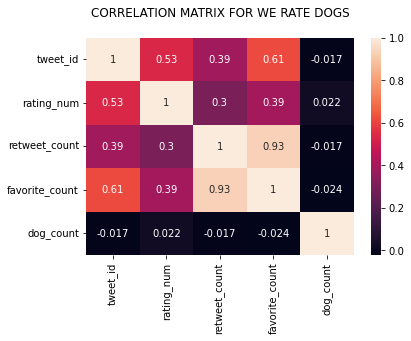

In [201]:
crmplt = sns.heatmap(wrdogx.corr(), annot = True) 
            
crmplt.set(title = "CORRELATION MATRIX FOR WE RATE DOGS\n")
plt.show()

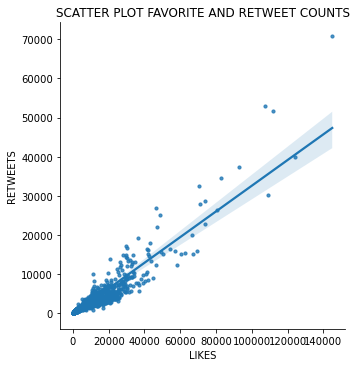

In [202]:
#Revenue vs Profit
sns.lmplot(x ='favorite_count', y='retweet_count', data=wrdogx, fit_reg=True, scatter_kws={"marker": "D", "s": 10})
plt.title('SCATTER PLOT FAVORITE AND RETWEET COUNTS')
plt.xlabel('LIKES')
plt.ylabel('RETWEETS')
plt.show()

#### Observations

> Notable observation is the correlation between likes and retweets on dog post.

### Distribution of Stages of Dogs

In [203]:
stageplt = pd.DataFrame(wrdogx.stage.value_counts())
stageplt.reset_index()

,index,stage
0,pupper,201
1,doggo,63
2,puppo,22
3,doggo\pupper,8
4,doggo\puppo,1


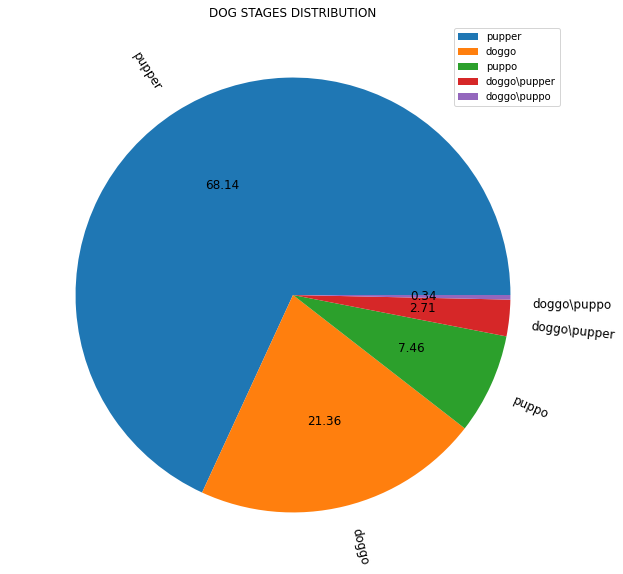

In [204]:
stageplt.plot(y='stage', kind='pie', autopct='%.2f', fontsize=12, figsize=(10, 10), rotatelabels=True, title = "DOG STAGES DISTRIBUTION");
plt.ylabel(" ");

### Distribution of breeds of Dogs

In [205]:
breed10 = pd.DataFrame(wrdogx.breed.value_counts().sort_values(ascending=False).head(10))
breed10

,breed
Golden retriever,155
Labrador retriever,103
Pembroke,94
Chihuahua,90
Pug,62
Toy poodle,49
Chow,48
Samoyed,41
Pomeranian,41
Malamute,33


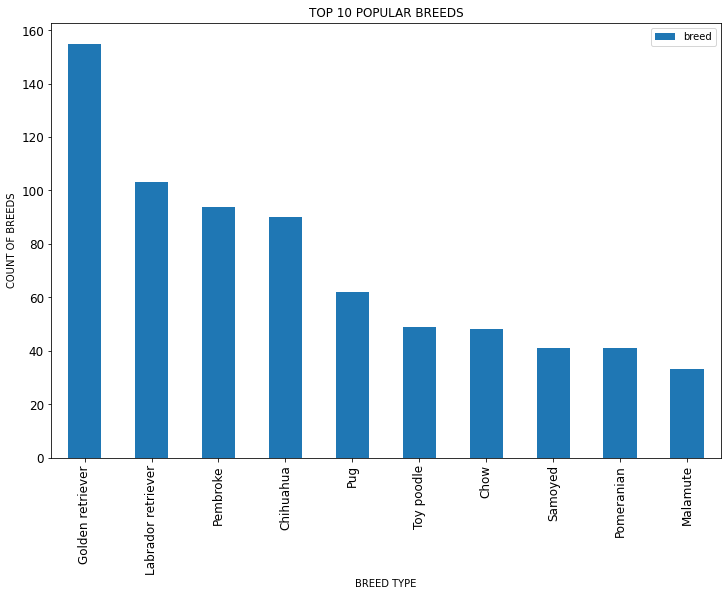

In [206]:
breed10.plot( kind = 'bar', fontsize=12, figsize=(12,8));
plt.xlabel('BREED TYPE')
plt.ylabel('COUNT OF BREEDS')
plt.title('TOP 10 POPULAR BREEDS')
plt.show()

#### Stages and Favorite Counts

In [207]:
stagex = wrdogx.groupby(['stage']).sum().sort_values(by='favorite_count', ascending=False)
stagex.reset_index()

,stage,tweet_id,rating_num,retweet_count,favorite_count,dog_count
0,pupper,1.444591e+20,2138.27,387129,1256979,201
1,doggo,5.027383e+19,747.00,373335,1106638,63
2,puppo,1.779792e+19,264.00,117231,430763,22
3,doggo\pupper,6.198193e+18,88.00,29821,101762,8
4,doggo\puppo,8.558515e+17,13.00,16143,41927,1


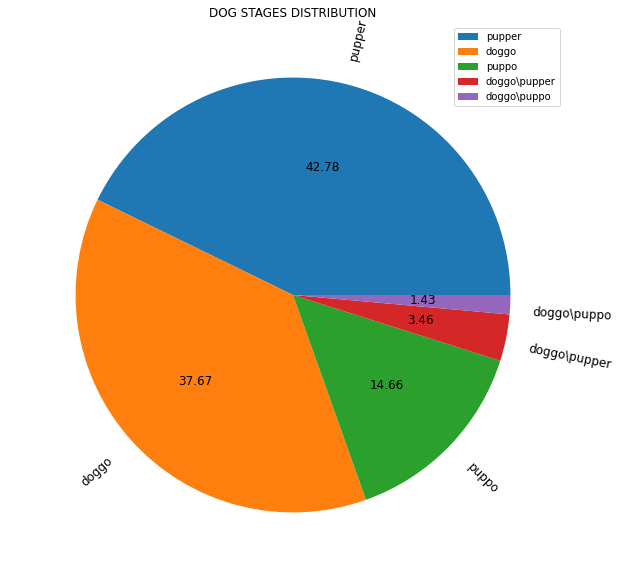

In [208]:
stagex.plot(y='favorite_count', kind='pie', autopct='%.2f', fontsize=12, figsize=(10, 10), rotatelabels=True, title = "DOG STAGES DISTRIBUTION");
plt.ylabel(" ");

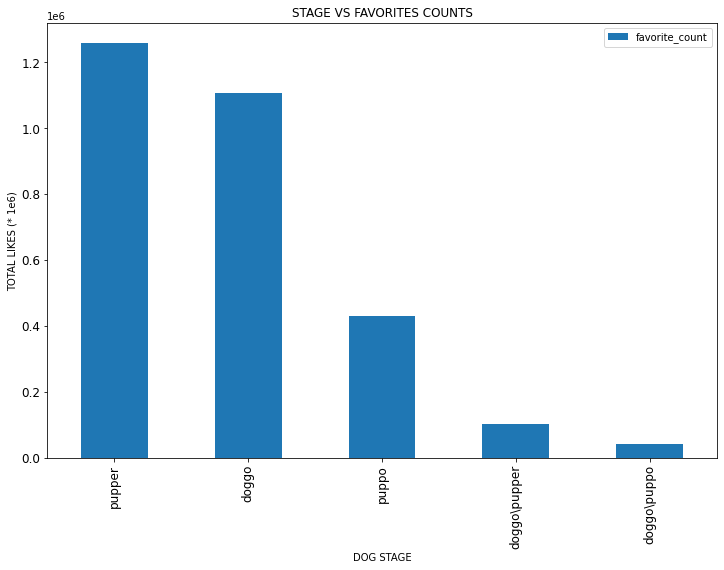

In [209]:
stagex.plot(y='favorite_count', kind = 'bar', fontsize=12, figsize=(12,8));
plt.xlabel('DOG STAGE')
plt.ylabel('TOTAL LIKES (* 1e6)')
plt.title('STAGE VS FAVORITES COUNTS')
plt.show()

#### Breeds and Favorite Counts

In [210]:
breedx = wrdogx.groupby(['breed']).sum().sort_values(by='favorite_count', ascending=False).head(10)
breedx.reset_index()

,breed,tweet_id,rating_num,retweet_count,favorite_count,dog_count
0,Golden retriever,1.173593e+20,1801.5,475517,1681304,163
1,Labrador retriever,7.706275e+19,1151.0,311924,1031647,127
2,Pembroke,7.103179e+19,1074.0,236772,905630,94
3,Chihuahua,6.487619e+19,948.0,210106,667233,90
4,French bulldog,2.355418e+19,335.0,132258,526368,30
5,Samoyed,3.086788e+19,481.0,156168,482328,41
6,Chow,3.587444e+19,548.0,107290,389759,59
7,Cocker spaniel,2.260826e+19,340.0,118815,352347,30
8,Pug,4.449408e+19,635.0,94463,325571,62
9,Malamute,2.466406e+19,359.0,88573,304856,33


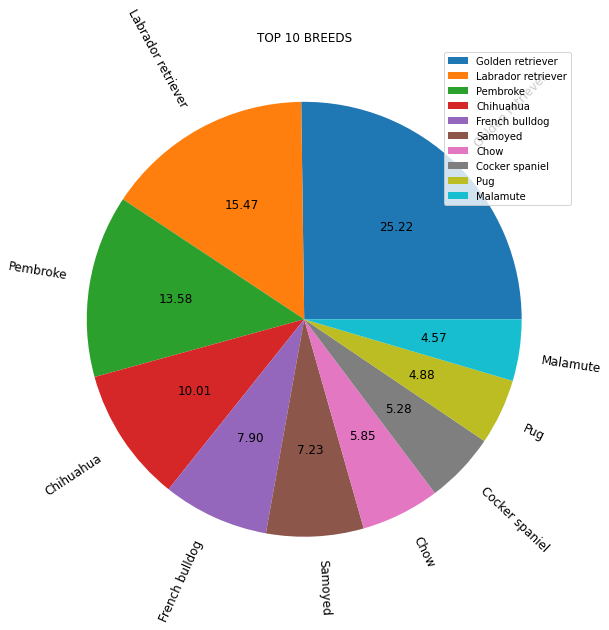

In [211]:
breedx.plot(y='favorite_count', kind='pie', autopct='%.2f', fontsize=12, figsize=(10, 10), rotatelabels=True, title='TOP 10 BREEDS');
plt.ylabel(" ");

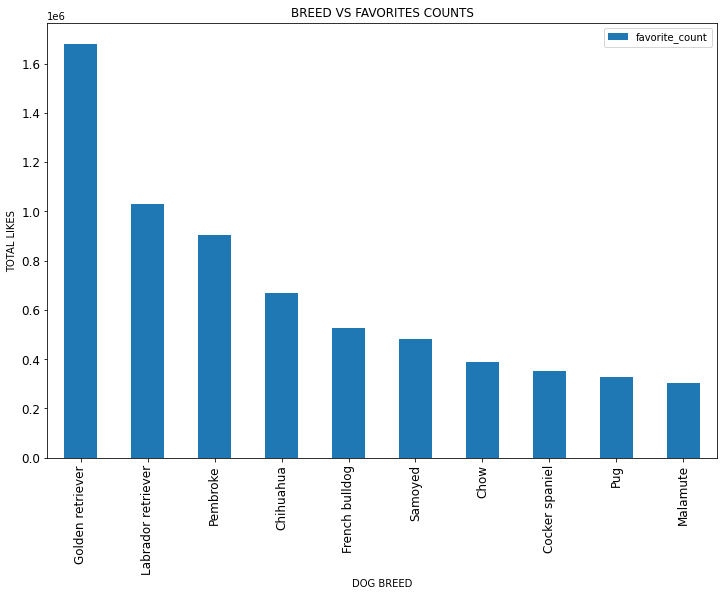

In [212]:
breedx.plot(y='favorite_count', kind = 'bar', fontsize=12, figsize=(12,8), title='BREED VS FAVORITES COUNTS');
plt.xlabel('DOG BREED')
plt.ylabel('TOTAL LIKES')
plt.show()

#### Conclusion

> See attached reports for conclusion

### End of Project